In [20]:
pip install pandas_datareader

In [3]:
pip install yfinance

     -------------------------------------- 65.3/65.3 kB 706.1 kB/s eta 0:00:00
     ---------------------------------------- 62.6/62.6 kB 1.7 MB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime

In [6]:
import yfinance as yf
df = yf.download('AAPL', start = '2010-01-01', end='2019-01-01')

[*********************100%%**********************]  1 of 1 completed


In [7]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395378,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800
...,...,...,...,...,...,...
2018-12-24,37.037498,37.887501,36.647499,36.707500,35.278671,148676800
2018-12-26,37.075001,39.307499,36.680000,39.292500,37.763054,234330000
2018-12-27,38.959999,39.192501,37.517502,39.037498,37.517979,212468400


In [8]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395378,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383556,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425996,447610800


In [9]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


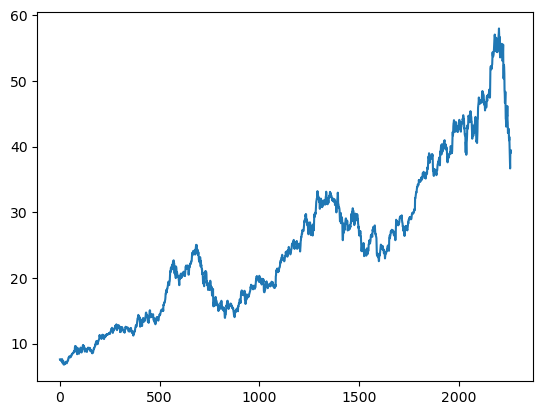

In [10]:
plt.plot(df.Close)

In [11]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2259,37.037498,37.887501,36.647499,36.707500,148676800
2260,37.075001,39.307499,36.680000,39.292500,234330000
2261,38.959999,39.192501,37.517502,39.037498,212468400
2262,39.375000,39.630001,38.637501,39.057499,169165600


In [12]:
ma100 = df.Close.rolling(100).mean()

In [13]:
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2259    51.285075
2260    51.159525
2261    51.029925
2262    50.897825
2263    50.774400
Name: Close, Length: 2264, dtype: float64

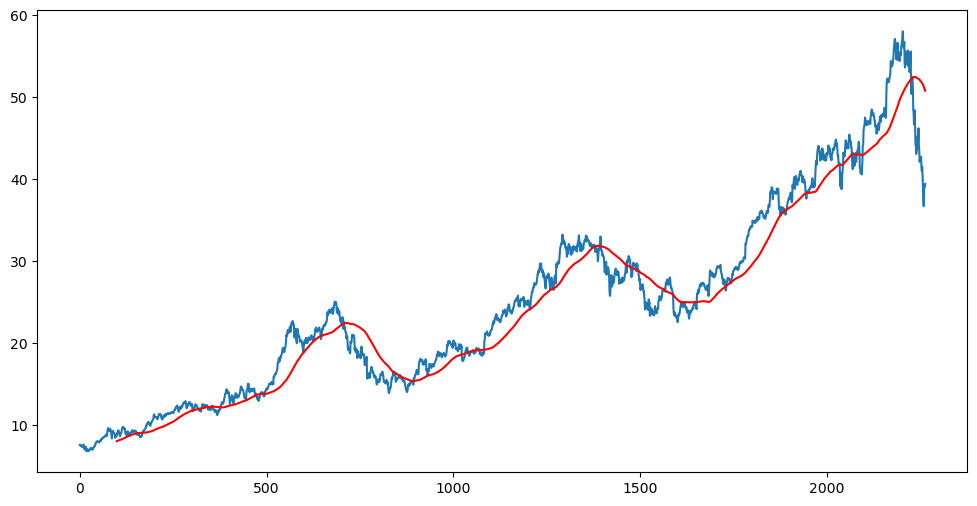

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [15]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2259    48.436525
2260    48.405838
2261    48.376063
2262    48.348300
2263    48.322163
Name: Close, Length: 2264, dtype: float64

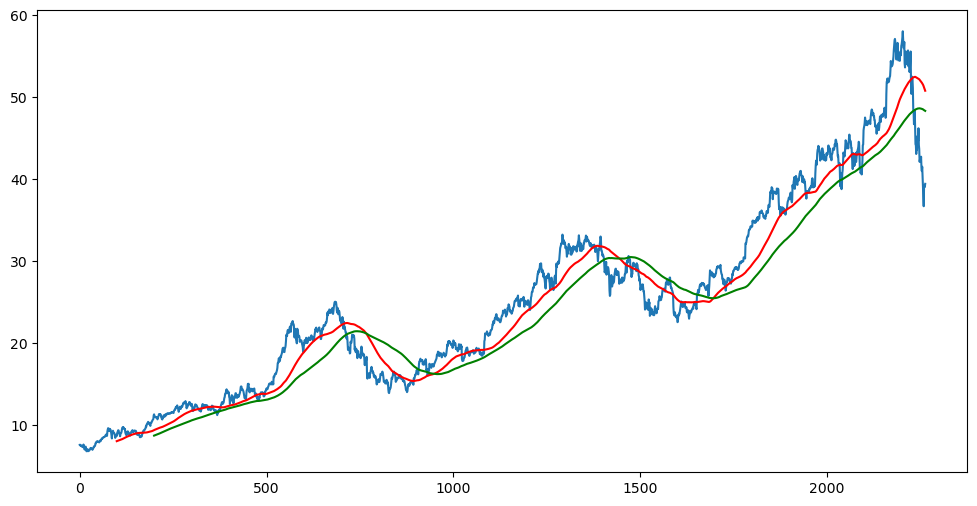

In [16]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [17]:
df.shape

(2264, 5)

In [18]:
# Splitting the Data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1584, 1)
(680, 1)


In [19]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [20]:
data_testing.head()

,Close
1584,26.782499
1585,26.492500
1586,26.420000
1587,26.270000
1588,26.087500


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [22]:
data_training_array = scaler.fit_transform(data_training)

In [23]:
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.78070233],
       [0.7582516 ],
       [0.75285205]])

In [24]:
x_train = []
y_train = []

for i in range(100,data_training.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
x_train.shape

(1484, 100, 1)

In [26]:
# ML Model

In [27]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [28]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
          
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
          
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
          
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units = 1))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [30]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
47/47 [==============================] - 20s 253ms/step - loss: 0.0673
Epoch 2/50
47/47 [==============================] - 11s 230ms/step - loss: 0.0145
Epoch 3/50
47/47 [==============================] - 11s 234ms/step - loss: 0.0123
Epoch 4/50
47/47 [==============================] - 11s 241ms/step - loss: 0.0093
Epoch 5/50
47/47 [==============================] - 11s 234ms/step - loss: 0.0103
Epoch 6/50
47/47 [==============================] - 12s 245ms/step - loss: 0.0084
Epoch 7/50
47/47 [==============================] - 12s 245ms/step - loss: 0.0084
Epoch 8/50
47/47 [==============================] - 11s 232ms/step - loss: 0.0080
Epoch 9/50
47/47 [==============================] - 11s 239ms/step - loss: 0.0089
Epoch 10/50
47/47 [==============================] - 11s 238ms/step - loss: 0.0076
Epoch 11/50
47/47 [==============================] - 11s 238ms/step - loss: 0.0077
Epoch 12/50
47/47 [==============================] - 11s 237ms/step - loss: 0.0064
Epoch 13/50
4

In [31]:
model.save('Keras_model.h5')

In [32]:
data_testing.head()

,Close
1584,26.782499
1585,26.492500
1586,26.420000
1587,26.270000
1588,26.087500


In [33]:
past_100_days = data_training.tail(100)

In [34]:
final_df = past_100_days.append(data_testing, ignore_index = True)

C:\Users\gsrp4\AppData\Local\Temp\ipykernel_26420\3299050086.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [35]:
final_df.head()

,Close
0,29.719999
1,29.507500
2,29.452499
3,29.575001
4,29.334999


In [36]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.20136879],
       [0.19537148],
       [0.19381923],
       [0.19727654],
       [0.19050305],
       [0.18302406],
       [0.17540393],
       [0.20242715],
       [0.1971354 ],
       [0.19678265],
       [0.17836735],
       [0.18224794],
       [0.1611515 ],
       [0.15621255],
       [0.14217173],
       [0.14816904],
       [0.13151771],
       [0.11070346],
       [0.11987585],
       [0.11917029],
       [0.1289071 ],
       [0.1248148 ],
       [0.11627744],
       [0.12982431],
       [0.11980528],
       [0.10527062],
       [0.1059056 ],
       [0.08727864],
       [0.07309673],
       [0.04311014],
       [0.04670855],
       [0.05778594],
       [0.06787555],
       [0.04974249],
       [0.06477104],
       [0.047908  ],
       [0.04459188],
       [0.0455091 ],
       [0.04205183],
       [0.07817682],
       [0.06420663],
       [0.06808721],
       [0.02173147],
       [0.02645876],
       [0.04938968],
       [0.04296905],
       [0.02921052],
       [0.042

In [37]:
input_data.shape

(780, 1)

In [38]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [39]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(680, 100, 1)
(680,)


In [40]:
# Making Prediction

y_predicted = model.predict(x_test)

22/22 [==============================] - 4s 109ms/step


In [41]:
y_predicted.shape

(680, 1)

In [42]:
y_test

array([0.11846468, 0.11028014, 0.10823399, 0.1040006 , 0.09884993,
       0.05277643, 0.03167999, 0.02398928, 0.02328373, 0.03414946,
       0.02716437, 0.02046145, 0.01679253, 0.01728642, 0.02173147,
       0.01531084, 0.        , 0.00127002, 0.02497707, 0.02222537,
       0.02977493, 0.02723489, 0.0344317 , 0.04296905, 0.05334089,
       0.06547665, 0.07105064, 0.07062726, 0.06717   , 0.05729205,
       0.05207087, 0.05348198, 0.0584915 , 0.06131378, 0.06067879,
       0.06568831, 0.05990267, 0.04938968, 0.05023638, 0.04797857,
       0.05087142, 0.03520783, 0.033585  , 0.03930013, 0.03676008,
       0.04064067, 0.02159038, 0.01199467, 0.02293092, 0.02864605,
       0.03711283, 0.03915898, 0.03280887, 0.03661894, 0.03951179,
       0.04473297, 0.04684969, 0.04995415, 0.04607356, 0.05962043,
       0.05954986, 0.06695833, 0.06724057, 0.06787555, 0.06413606,
       0.05870322, 0.04938968, 0.0446624 , 0.08897199, 0.09877936,
       0.09786214, 0.1108446 , 0.0997672 , 0.10901011, 0.10957

In [43]:
y_predicted

array([[0.17501093],
       [0.17692107],
       [0.17851585],
       [0.17972931],
       [0.18050611],
       [0.18080863],
       [0.18059605],
       [0.17983928],
       [0.17853524],
       [0.17670843],
       [0.17441115],
       [0.1717155 ],
       [0.16870618],
       [0.16547407],
       [0.1621103 ],
       [0.15870091],
       [0.15532255],
       [0.15203825],
       [0.1488975 ],
       [0.14594108],
       [0.14320454],
       [0.14071307],
       [0.13848254],
       [0.13651961],
       [0.13482586],
       [0.13339964],
       [0.13223666],
       [0.13133067],
       [0.13067019],
       [0.13023907],
       [0.13001995],
       [0.12999219],
       [0.13013269],
       [0.13041732],
       [0.13082176],
       [0.1313214 ],
       [0.13189219],
       [0.13251114],
       [0.13315473],
       [0.13379999],
       [0.13442636],
       [0.1350164 ],
       [0.13555506],
       [0.13602889],
       [0.13642827],
       [0.13674651],
       [0.1369814 ],
       [0.137

In [44]:
factor = scaler.scale_

In [45]:
scale_factor = 1/factor

In [46]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [54]:
from sklearn.metrics import mean_squared_error

In [56]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print("RMSE:", rmse)

# Calculate RMSE percentage
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("RMSE Percentage:", rmse_percentage)

RMSE: 2.225717959329927
RMSE Percentage: 14.189884566320131


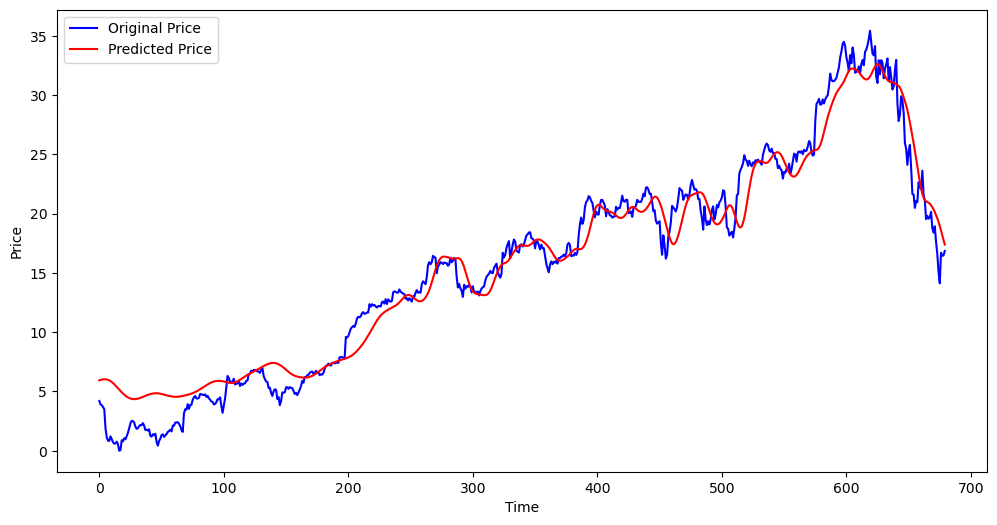

In [71]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()